In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, widgets
%matplotlib inline


First we establish a function f(x) which we will name fun to be called in our other functions.

In [3]:
def func(xi):
    y= -(2*xi[0]+3*xi[1]-xi[0]**3-2*xi[1]**2);
    return y

In [4]:
def fun(xi):
    from numpy import arange,append,transpose
    y=func(xi)
    dy=[]
    dx=0.000000000001
    k=arange(1,len(xi)+1,1)
    #print(k)
    for i in k:
        xtemp=xi[:]
        xtemp[i-1]=xtemp[i-1]+dx
        ytemp=func(xtemp)
        ydif=ytemp-y
        a = (ydif)/dx
        dy=append(dy,a)
        
        
    return y,dy


Next, we will establish a function func_a which will define the search function along its path.

In [5]:
def func_a(fun,dk,xk,ai):
    from numpy import asarray
    xi = xk + ai*dk
    fi= fun(xi)
    return fi

Now, we will establish a function to search for the upper and lower bounds of our search. If this domain contains the function minimum then the while loop will break.

In [6]:
def bound_search(fun,xk,dk,LB,UB,delta):
    from numpy import arange
    from numpy import asarray
    as1= arange(LB,UB,delta)
    q=1
    aq=as1[q]
    xq=xk+dk*aq
    yq1=func_a(fun,dk,xk,aq)
    while 1:
        q=q+1;
        aq=as1[q]
        yq2 = func_a(fun,dk,xk,aq)
        if (yq1<yq2):
            new_LB=as1[q-2]
            new_UB=as1[q]
            break   
        if q==len(as1):
            new_LB=as1[q-2]
            new_UB=as1[q]
            break
        yq1=yq2[:]
    return (new_LB,new_UB)

Now, we will establish a function to impliment the line search method. The bounds are searched iteratively until they are within a tolerance epsilon value

In [7]:
#from matplotlib import *
def line_search_equal_interval(fun, xk, dk):

    from numpy import arange
    from numpy import append
    #from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,ylim,xlim,xticks,yticks
    #%matplotlib inline
    UB=10
    LB=0
   
    delta = .05
    r = .2
    epsilon_tolerance2 = .0001
    aopt_found = 0
    iter1 = 1
   
    
    while not (aopt_found == 1):
        (new_LB, new_UB) = bound_search(fun, xk, dk, LB, UB, delta)
        if abs(new_UB - new_LB) < epsilon_tolerance2:
            aopt_found = 1;
        delta = r * delta
        LB = new_LB
        UB = new_UB
        
        iter1 = iter1 + 1
        a_opt = (UB + LB) / 2
   

    return a_opt

In [8]:
def golden_search(fun,xk,dk):
    import math
    from numpy import arange
    from numpy import append
    from numpy import asarray
    #from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,xlim,ylim,xticks,yticks   
    from numpy import sum
    %matplotlib inline
    LB=0
    UB=10  
    delta=.01
    etol =.0001
    r=(1+math.sqrt(5))/2
    ir=1/r
    at=arange(LB,UB,delta)
    xas=[]
    yts=[]
    sn = len(at)
    sn = arange(0, sn, 1)
    iterations=0
    for i in sn:
        fi = func_a(func,dk,xk,at[i])
        yts = append(yts,fi)
    ymin=min(yts)   
    ymax=max(yts)
    #fig, ax = subplots()
    #CS = ax.plot(at,yts)
    #####plotting custimization
    #grid()
    ##xlabel('Search Path',fontsize=24)
    #ylabel('Objective Function Value',fontsize=24)
    #title('Objective Function Optimization with Golden Section Search',fontsize=24)
    #fig.set_size_inches(18.5, 10.5)
    #xlim(xmin,xmax)
    #####
    a0=delta
    f0=func_a(func,dk,xk,a0)
    a1=delta+delta*r
    f1=func_a(func,dk,xk,a1)
    id1=2
    
    #plot(a0,f0,'rx',markersize=5)
    #plot(a1,f1,'rx',markersize=5)
    
    while 1:
        a2 = delta*sum(r**asarray(arange(0,id1,1)))
        f2 = func_a(func,dk,xk,a2)
        #plot(a2,f2,'rx',markersize=5)
        if (f0>f1) & (f1<f2):
            break
        else:
            id1=id1+1
            a0=a1
            a1=a2
            f0=f1
            f1=f2
    
    ##phase 2
    
    
    aL=a0
    aA=a1
    aU=a2
    fL=f0
    fA=f1
    fU=f2
      
    
    Intv0=aU-aL
    aB=aL+ir*Intv0
    fB=func_a(func,dk,xk,aB)
    
    #plot(aL,fL,'bo',markerfacecolor="None")
    #plot(aA,fA,'bo',markerfacecolor="None")
    #plot(aB,fB,'bo',markerfacecolor="None")
    #plot(aU,fU,'bo',markerfacecolor="None")    
            
    while 1:
        #plot(aA,fA,'bx',markersize=5)
        #plot(aB,fB,'bx',markersize=5)
        
        if (fA<fB):
            aL=aL
            aU=aB
            aB=aA
            fL=fL
            fU=fB
            fB=fA
            Intv1=aU-aL
            aA=aL+(1-ir)*Intv1
            fA=func_a(func,dk,xk,aA)
        else:
            aL=aA
            aU=aU
            aA=aB
            fL=fA
            fU=fU
            fA=fB
            Intv1=aU-aL
            aB=aL+ir*Intv1
            fB=func_a(func,dk,xk,aB)
        if (abs(Intv1-Intv0) < etol):
            break
        else:
            Intv0=Intv1
        iterations=iterations+1
    a_opt = (aU+aL)/2
    #plot(a_opt, min(yts), 'rx',label='optimal design point',markersize=20)
    #legend(loc=0,fontsize=24)
    f_opt = (fU+fL)/2
    return a_opt

Now, we establish a steepest descent function and a ex10_25_fx_graphic() function:

In [9]:
def ex10_25_fx_graphic():
    from numpy import arange,meshgrid
    
    xs=arange(0,2,.01)
    [x1,x2]=meshgrid(xs,xs)
    f=func([x1,x2])
    fig,ax=plt.subplots()
    CS=ax.contour(x1,x2,f,1000,cmap='Spectral')
    plt.colorbar(CS)
    plt.xlabel('x1',fontsize=24)
    plt.ylabel('x2',fontsize=24)
    fig.set_size_inches(18.5, 10.5)
    
    


In [12]:
def steepest_descent():
    from numpy import linalg,transpose,arange,meshgrid,append,asarray
    xka=[]
    xkx=[]
    xky=[]
    x0=[.2,0]
    k=0
    epsilon_tol1=.04
    xk=x0[:]
    
    xka=append(xka,xk[:])
    iter=0
    while 1:
        
        
        iter=iter+1;
        #print("xk:"+str(xk))
        y,dy=fun(xk)
        ck=dy
        #print('dy:'+str(dy))
        
        
        
        
        if (linalg.norm(ck)<epsilon_tol1):
            print('break occured after '+str(iter)+" iterations of steepest descent algorithm")
            print("Final xk:"+str(xk))
            break
        
        dk=-ck[:]
        
        
        a_opt=line_search_equal_interval(fun, xk, dk)
        #a_opt=golden_search(fun,xk,dk)
        print("a_opt: "+str(a_opt))
        xk=xk+a_opt*dk
        xka=append(xka,xk[:])
       
        
        k=k+1
        
    print("xka:"+str(xka))
    
    for i in arange(0,len(xka),2):
        xkx=append(xkx,xka[i])
    print("xkx:"+str(xkx))
    for i in arange(1,len(xka),2):
        xky=append(xky,xka[i])
    print("xky:"+str(xky))
    
    ex10_25_fx_graphic()
    #CS= plt.scatter(xka[0],xka[1])
    CS= plt.scatter(xkx,xky)
    CS= plt.plot(xkx,xky,'b--',linewidth=2)
    plt.show()
    
   

a_opt: 0.27422400000000025
a_opt: 0.15129599999999999
a_opt: 0.3407680000000003
a_opt: 0.12859199999999998
break occured after 5 iterations of steepest descent algorithm
Final xk:[0.82349831 0.74455679]
xka:[0.2        0.         0.71554007 0.82266902 0.78581968 0.8488727
 0.8360617  0.76442979 0.82349831 0.74455679]
xkx:[0.2        0.71554007 0.78581968 0.8360617  0.82349831]
xky:[0.         0.82266902 0.8488727  0.76442979 0.74455679]


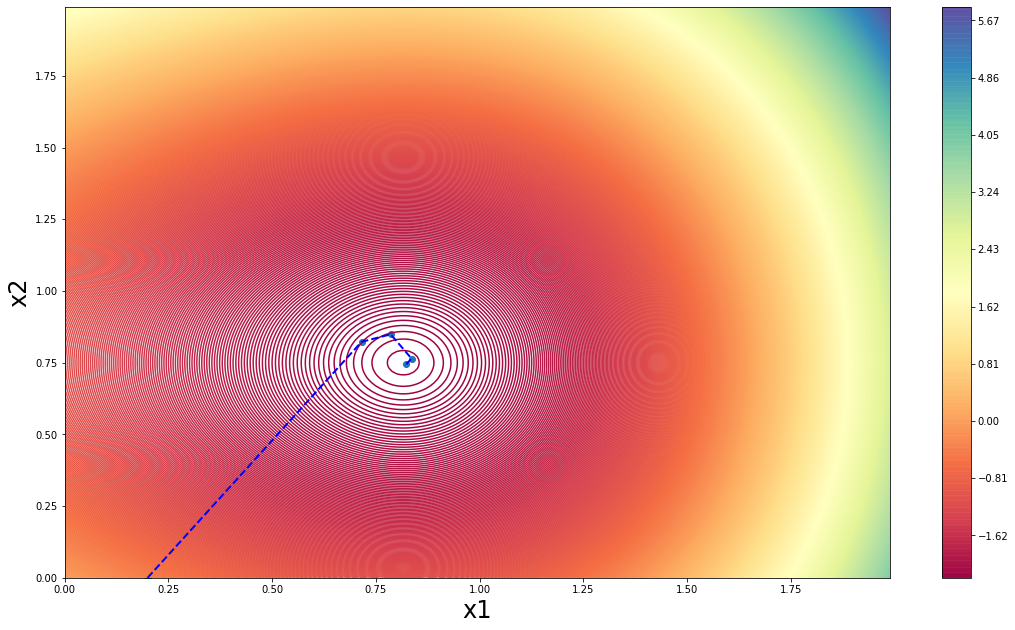

In [13]:
steepest_descent()